## import libraries :

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

## import data

In [14]:
data = pd.read_csv("data.csv")
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Data info :

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes



Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, we can use a scatter plot using Seaborn to visualize the data, since it has only two variables: the Scores and Hours.

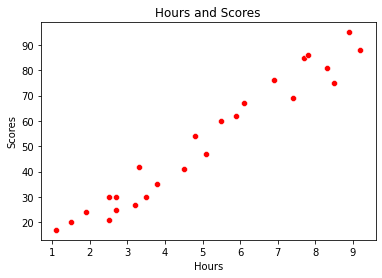

In [17]:
rep = sns.scatterplot(x = "Hours", y = "Scores", data = data, color = "red")
rep.set_title("Hours and Scores");

## Create a regression model and fit it with our data¶

Preparing the data by creating the x and y axis :

In [18]:
X = data.Hours.values.reshape(-1,1)
Y = data.Scores.values.reshape(-1,1)

Now that we have our x and y axis, the next step is to split this data into training and testing subsets. By using Scikit-Learn's built-in train_test_split() method:

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15,random_state=0)

Et voila, Let the model get trained :

In [22]:
reg = LinearRegression()  
print("Training the model...")
reg.fit(X_train, Y_train) 
print("Training complete !")    
print("Y = ",reg.coef_[0][0],"*X+(",reg.intercept_[0],")")

Training the model...
Training complete !
Y =  9.918306678342628 *X+( 2.049688128927201 )


Scores = 9.92*Hours + 2.05


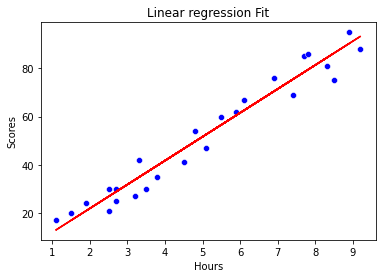

In [23]:
# Plotting the original scatter plot 
sns.scatterplot(x = "Hours", y = "Scores", data = data, color = "blue")

# The regression line : new Y
Y_value = reg.coef_*X + reg.intercept_

print("Scores = %.2f*Hours +" % reg.coef_, "%.2f" %reg.intercept_)
# Draw the line of linear regression
plt.plot(X, Y_value, 'r');

plt.title("Linear regression Fit");

## Make predictions using the testing set :

In [24]:
Y_pred=reg.predict(X_test)

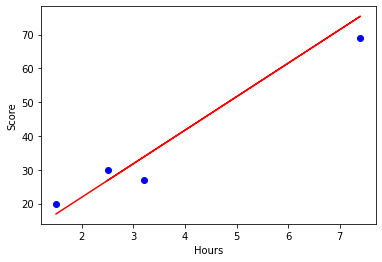

In [25]:
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, Y_pred, color='red') 
plt.xlabel('Hours')  
plt.ylabel('Score') 
rep.set_title("Scores vs Hours");

## Make a prediction :

In [27]:
Hours = np.array([[9.25]])
own_pred = reg.predict(Hours)
print("No of study Hours = %.2f" % Hours[0][0])
print("Predicted Score = %.2f" % own_pred[0])

No of study Hours = 9.25
Predicted Score = 93.79


## Evaluate the model :

In [28]:

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))

# The mean absolute Error
print('Mean Absolute Error: %.2f' % mean_absolute_error(Y_test, Y_pred)) 

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 26.75
Mean Absolute Error: 4.87
Coefficient of determination: 0.93


# Thank you for watching !!!